Einleitung ...
Musikstreaming, Milliardenmarkt, kulturelle Bedeutung ...

## 1 Importierung benötigter Bibliotheken und des Datensatzes
In diesem Kapitel wird XY gemacht.

### 1.1 Laden der Bibliotheken
Innerhalb des Datenexplorationsprojektes werden die Bibliotheken XY benötigt.

In [1]:
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from matplotlib import pyplot as plt

### 1.2 Laden des Basis-Datensatzes

In [2]:
base_data = pd.read_csv("song_data.csv")
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


Der Basisdatensatz besteht aus 18.835 Einträgen mit je 15 Attributen ... Keine Lücken

In [3]:
base_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


## 2 Übersicht und Interpretation der Datenwerte


In [4]:
base_data.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
song_name           13070
dtype: int64

In [6]:
base_data.sort_values(by=["song_popularity"], ascending=False).head(20)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7568,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
15091,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
17392,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
14176,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
11665,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
11697,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
5593,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
4299,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
16497,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
17590,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671


- song_name = Name des Liedes (String)
- song_popularity = Beliebtheit des Liedes in % (int 0-100) --> WAS WIRD IN PROZENT ANGEGEBEN (STREAMS?`)????? The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
- song_duration = Länge des Liedes in ms (int 12s-30min)
- acousticness = Akustik eines Liedes in % (float 0-1) Wert von 1.0 bedeutet, dass es ein akustisches Lied ist (nicht elektronisch verstärkt)
- danceability = Tanzbarkeit in % (float 0-1) Wert von 1.0 bedeutet, dass das Lied sehr um Tanzen anregt, basierend auf musikalische Elemente wie unteranderem Tempo, Stabilität des Rhytmik, Stärke des Bass' und weiteren.
- energy = Intensität und Aktivität des Liedes in % (float 0-1), basierend auf der Schnelligkeit, Lautstärke und Rauschen des Liedes sowie der generellen Entropie. Wert von 1.0 bedeutet, dass ein Lied sehr energetisch ist, beispielsweise Death Metal
- instrumentalness = Instrumentalität in % (float 0-1), gibt an in wie weit Vocals im Lied vorhanden sind. Je näher an 1.0, desto wahrscheinlicher Lied ohne Vocals, ab 0.5 kann davon ausgegangen werden, dass Lied instrumental ist
- key = Tonart in dem Lied (int -1-11), -1 wenn keine primäre Tonart erkannt wurde (https://de.wikipedia.org/wiki/Tonklasse)
- liveness = Wahrscheinlichkeit, dass das Lied eine Liveversion ist (float 0-1), basierend auf Zuschauer/Zuhörer die im Hintegrund entdeckt werden, ab 0.8 kann davon ausgegangen werden, dass es eine Liveversion ist
- loudness = gibt die durchschnittliche Lautstärke des Liedes in Decibel an (float -38.0 - 1.5), Lautstärke ist relativ angegeben
- audio_mode = Modalität der Tonleiter (int 0=Moll oder 1=Dur) 
- speechiness = Exklusiv gesprochen, zum Beispiel Reden oder Gedichte (Racism And Injustice von Martin L. King), alles >0.66 sehr wahrscheinlich, dass nur Gesprochen wird, alles <0.33 wenig/kein gesprochenes Wort
- tempo = Schätzung zur Geschwindigkeit des Liedes in Beats per Minute (BPM) (float)
- time_signature = Taktangabe (int 3-7), gibt Takt von 3/4 Takt bis 7/4 Takt an
- audio_valence = Positivität des Liedes (float 0-1), Eine hohe Wertigkeit deutet auf positive Stimmung hin (fröhlich, euphorisch), ein niedriger Wert von einer negativen (aggresiv, melancholisch)

Quelle: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

### 2.1 Umgang mit fehlenden Werten oder Inkonsistenzen

In [7]:
cleared = base_data.drop_duplicates(subset = ["song_name", "song_duration_ms"], keep = "last").reset_index(drop = True)
cleared.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14468 entries, 0 to 14467
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14468 non-null  object 
 1   song_popularity   14468 non-null  int64  
 2   song_duration_ms  14468 non-null  int64  
 3   acousticness      14468 non-null  float64
 4   danceability      14468 non-null  float64
 5   energy            14468 non-null  float64
 6   instrumentalness  14468 non-null  float64
 7   key               14468 non-null  int64  
 8   liveness          14468 non-null  float64
 9   loudness          14468 non-null  float64
 10  audio_mode        14468 non-null  int64  
 11  speechiness       14468 non-null  float64
 12  tempo             14468 non-null  float64
 13  time_signature    14468 non-null  int64  
 14  audio_valence     14468 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.7+ MB


Redundanzen sind vorhanden, diese werden entfernt anhand gleichem Songtitel und gleicher Songlänge. Dadurch 14.468 Songs, somit circa 4.400 Redundanzen entfernt

In [8]:
cleared.sort_values(by=["song_popularity"], ascending=False).head(20)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
13326,Happier,100,214289,0.19100,0.687,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
13346,I Love It (& Lil Pump),99,127946,0.01140,0.901,0.522,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,0.329
13490,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.15300,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591
13592,Promises (with Sam Smith),98,213309,0.01190,0.781,0.768,0.000005,11,0.3250,-5.991,1,0.0394,123.070,4,0.486
13308,In My Feelings,98,217925,0.05890,0.835,0.626,0.000060,1,0.3960,-5.833,1,0.1250,91.030,4,0.350
13472,Eastside (with Halsey & Khalid),98,173799,0.55500,0.560,0.680,0.000000,6,0.1160,-7.648,0,0.3210,89.391,4,0.319
13290,Lucid Dreams,97,239835,0.34900,0.511,0.566,0.000000,6,0.3400,-7.230,0,0.2000,83.903,4,0.218
11606,In My Mind,97,184560,0.17600,0.694,0.770,0.000011,6,0.1180,-5.335,1,0.1490,125.905,4,0.163
13319,Falling Down,97,196400,0.01750,0.669,0.574,0.002940,4,0.1460,-6.442,0,0.0286,120.013,4,0.273
13469,SICKO MODE,97,312820,0.00513,0.834,0.730,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,0.446


Gegenprobe

In [11]:
cleared["song_name"].value_counts()

Heaven                          8
Fire                            8
Fall                            7
Gone                            7
Stay                            7
                               ..
The Way It Is                   1
Contrabando ( Contraband )      1
Like Whaaat (feat. Bad Lucc)    1
Eternal Flame                   1
Nobody Wins                     1
Name: song_name, Length: 13070, dtype: int64

Weiterhin sind Lieder mit dem selben Titel mehrfach vorhanden.
Fraglich ob vom selben Künstler und fraglich ob selbe Version des Liedes
Daher werden diese Redundanzen nicht entfernt.
Von den häufigen Songtiteln vorallem generische Wörte wie "Heaven", "Fire", "Fall", "Gone", "Stay"

### 2.2 Erweiterung des Datensatzes
Zur Erweiterung des Basis-Datensatzes wird die Spotify Web API (https://developer.spotify.com/documentation/web-api/) verwendet. Dazu werden eine Client-ID und ein Client-Secret benötigt, die im Rahmen von ... erstellt werden können. 

In [ ]:
CLIENT_ID = "28f2619d8a6242ceae8160c565174771"
CLIENT_SECRET = "5f6cb53e2614428380966f0e93e72c16"

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))

expanded = base_data.copy()

def expand_row(row):
    time.sleep(0.1) # Sleep 100ms, 10 rps, 600 requests per min
    results = sp.search(q=row.song_name, limit=50, type="track")

    for _, track in enumerate(results["tracks"]["items"]):
        if track["duration_ms"] == row.song_duration_ms:
            row["artist"] = track["artists"][0]["name"]
            row["explicit"] = track["explicit"]
            return row
    return row

expanded = expanded.apply(expand_row, axis=1)

Ausführung der Zelle hat circa 79 Minuten gedauert. Im Verlauf davon wurden 14.468 Anfragen an Spotify gesendet. Insgesamt wurden in vorherigen Tests circa 20.000 Anfragen an Spotify gesendet.

In [13]:
expanded.info()
expanded.to_csv("song_data_expanded.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14468 entries, 0 to 14467
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        14468 non-null  int64  
 1   acousticness      14468 non-null  float64
 2   artist            10503 non-null  object 
 3   audio_mode        14468 non-null  int64  
 4   audio_valence     14468 non-null  float64
 5   danceability      14468 non-null  float64
 6   energy            14468 non-null  float64
 7   explicit          10503 non-null  object 
 8   instrumentalness  14468 non-null  float64
 9   key               14468 non-null  int64  
 10  liveness          14468 non-null  float64
 11  loudness          14468 non-null  float64
 12  song_duration_ms  14468 non-null  int64  
 13  song_name         14468 non-null  object 
 14  song_popularity   14468 non-null  int64  
 15  speechiness       14468 non-null  float64
 16  tempo             14468 non-null  float6

Leider können bei circa 3900 Zeilen nicht zweifelsfrei Artist bzw. Explizit ermittelt werden. Würde man jeweils auf das erste Ergebnis zurück greifen, wenn mit gleicher Songlänge kein Lied gefunden würde, könnten alle Zeilen gefüllt werden. Aber es ist fraglich, ob das jeweilige Ergebnis richtig ist. Daher davon abgesehen

Wurde als eigene csv gecachet um weitere Anfragen zu vermeiden. Die CSV enthält sowohl die bereinigten Daten als auch die Erweiterungen.

In [14]:
cleared = pd.read_csv("song_data_expanded.csv")

## 3 Visualisierung und Korrelationen zwischen den Features


- Clustern nach Künstler, haben wenige Künstler viel Popularität oder eher One-Hit-Wunder? --> Z.b. Top 100 nur, da Künstler fehlen
- NLP vom Songtitel ?
- Genre in Bezug zum Zeitraum

### 3.1 Popularität eines Liedes

<AxesSubplot:>

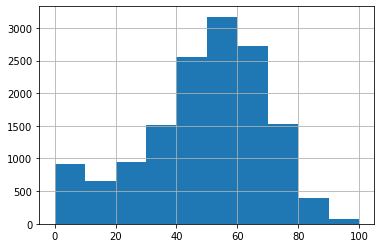

In [15]:
cleared["song_popularity"].hist()

### 3.2 Länge eines Liedes

<AxesSubplot:>

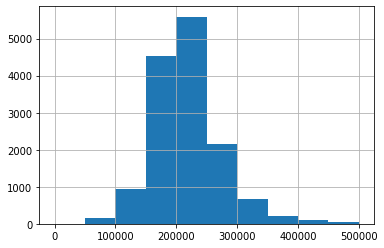

In [16]:
cleared["song_duration_ms"].hist(range=[0, 500000])

<AxesSubplot:>

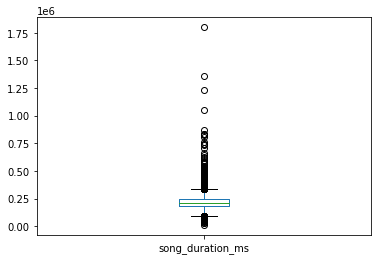

In [20]:
cleared["song_duration_ms"].plot.box()

### 3.3 Musikalische Eigenschaften eines Liedes

<AxesSubplot:>

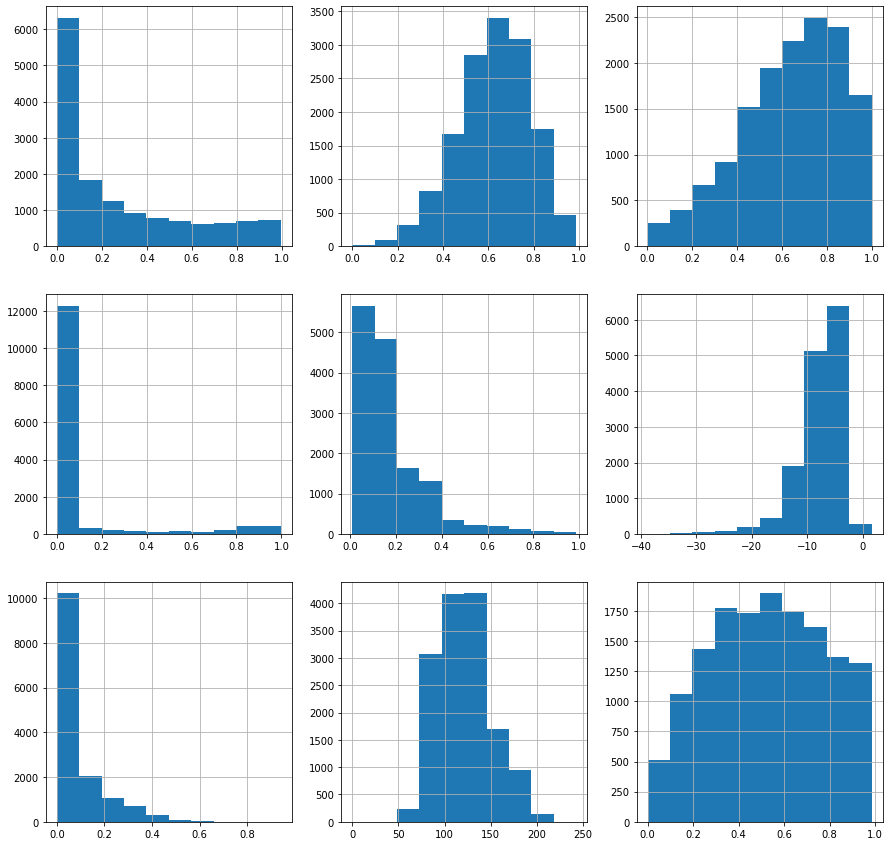

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(15)
fig.set_figwidth(15)

cleared["acousticness"].hist(ax=axes[0,0])
cleared["danceability"].hist(ax=axes[0,1])
cleared["energy"].hist(ax=axes[0,2])

cleared["instrumentalness"].hist(ax=axes[1,0])
cleared["liveness"].hist(ax=axes[1,1])
cleared["loudness"].hist(ax=axes[1,2])

cleared["speechiness"].hist(ax=axes[2,0])
cleared["tempo"].hist(ax=axes[2,1])
cleared["audio_valence"].hist(ax=axes[2,2])

#### 3.3.1 Acousticness

<AxesSubplot:>

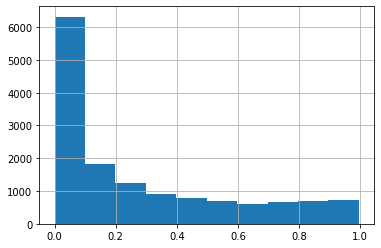

In [21]:
cleared["acousticness"].hist()

#### 3.3.2 Danceability

<AxesSubplot:>

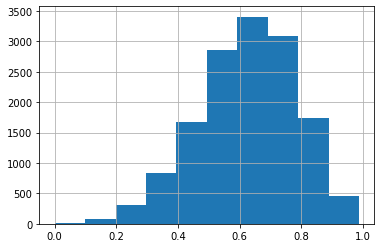

In [40]:
cleared["danceability"].hist()

#### 3.3.3 Energy

<AxesSubplot:>

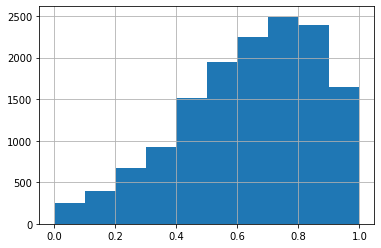

In [41]:
cleared["energy"].hist()

#### 3.3.4 Instrumentalness

<AxesSubplot:>

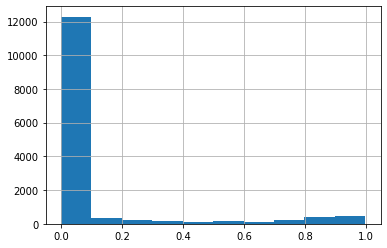

In [42]:
cleared["instrumentalness"].hist()

#### 3.3.5 Liveness

<AxesSubplot:>

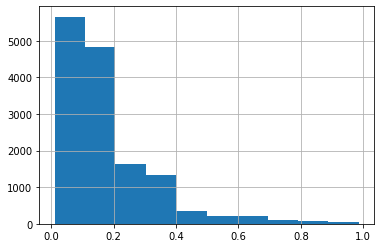

In [44]:
cleared["liveness"].hist()

#### 3.3.6 Loudness

<AxesSubplot:>

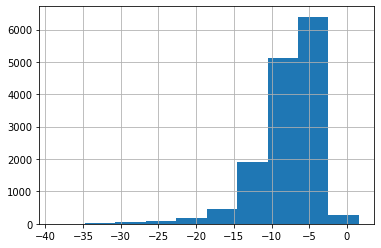

In [45]:
cleared["loudness"].hist()

#### 3.3.7 Speechiness

<AxesSubplot:>

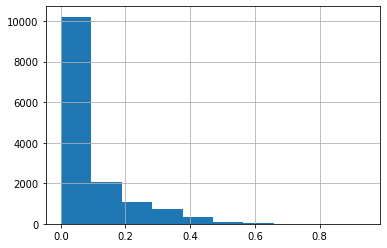

In [47]:
cleared["speechiness"].hist()

#### 3.3.8 Tempo

<AxesSubplot:>

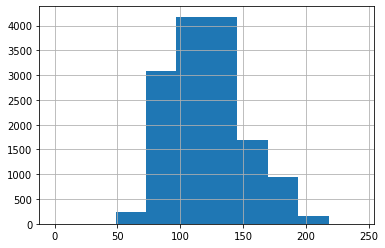

In [48]:
cleared["tempo"].hist()

#### 3.3.9 Audio Valence

<AxesSubplot:>

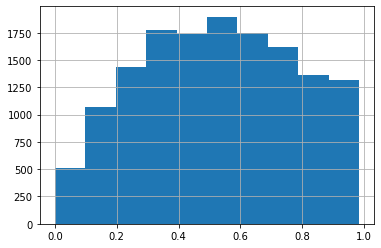

In [49]:
cleared["audio_valence"].hist()

## 3.4 Korrelationen zwischen den Datenwerten

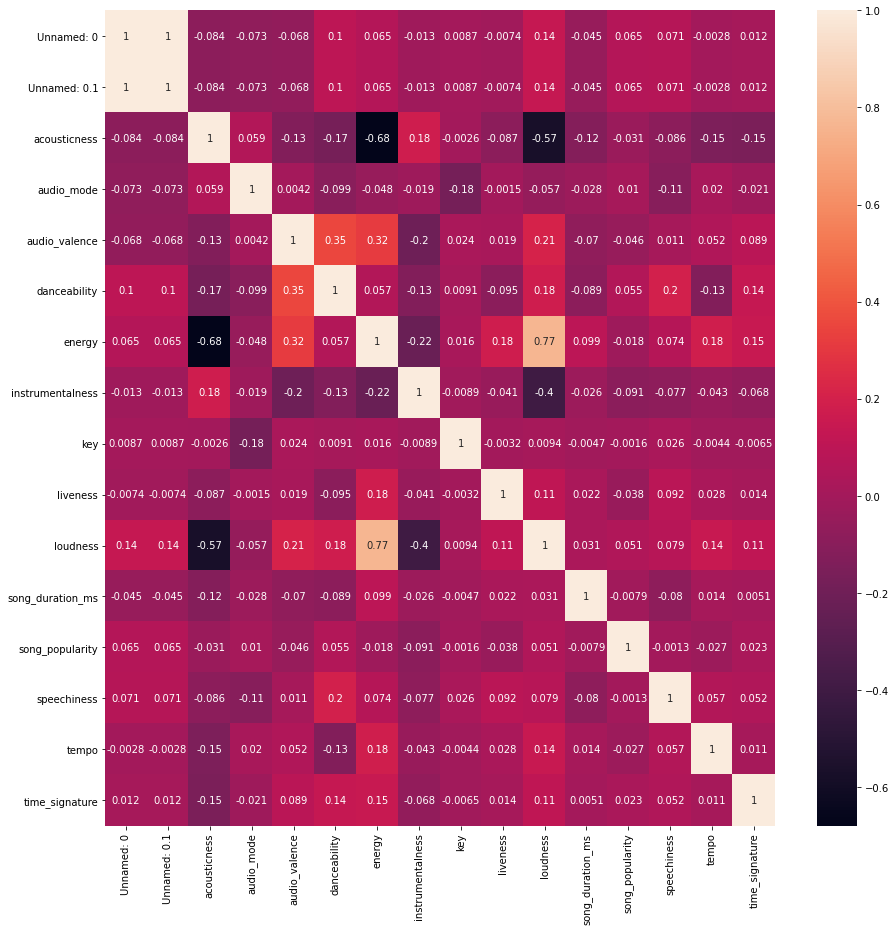

In [22]:
# Instrumentalness mit accousticness
matrix1 = cleared.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(matrix1, annot=True)
plt.show()

## 4 Datentransformation

## 5 Maschinelles Lernen

## 6 Diskussion

- Auf welcher Basis wurden die 18.000 Lieder ausgewählt? Stichprobenverzerrung???
- Datensatz wahrscheinlich aus 2018. Wie wirken sich Trends evtl. aus?
- Was bedeutet Popularität?

### 6.1 Limitationen

### 6.2 Konklusion

## Quellenverzeichnis
